# Parallel Courses

You are given an integer n, which indicates that there are n courses labeled from 1 to n. You are also given an array relations where relations[i] = [prevCoursei, nextCoursei], representing a prerequisite relationship between course prevCoursei and course nextCoursei: course prevCoursei has to be taken before course nextCoursei.

In one semester, you can take any number of courses as long as you have taken all the prerequisites in the previous semester for the courses you are taking.

Return the minimum number of semesters needed to take all courses. If there is no way to take all the courses, return -1.

 

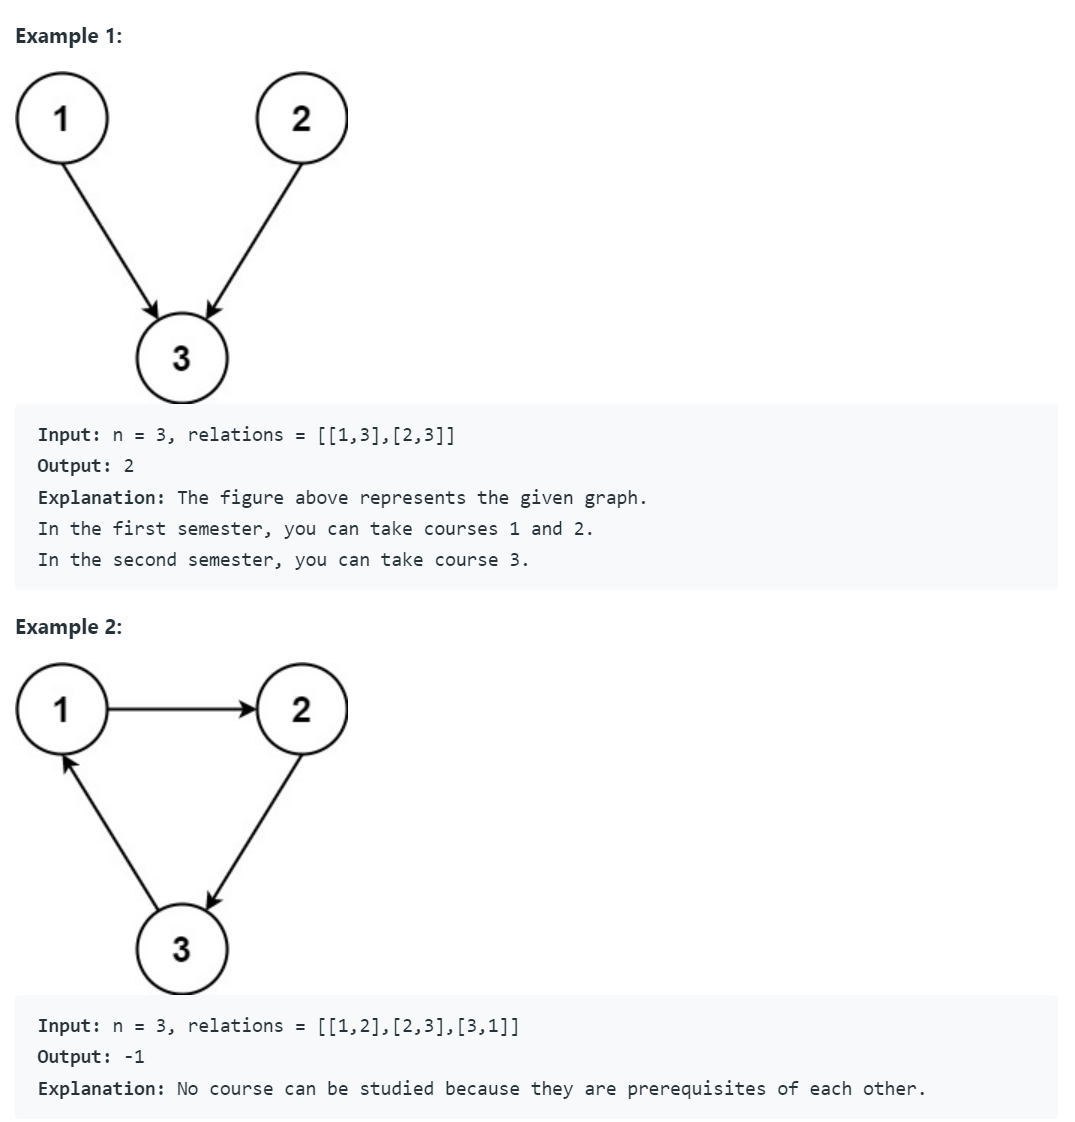

Constraints:
```
1 <= n <= 5000
1 <= relations.length <= 5000
relations[i].length == 2
1 <= prevCoursei, nextCoursei <= n
prevCoursei != nextCoursei
All the pairs [prevCoursei, nextCoursei] are unique.
```

In [1]:
class Solution:
    def minimumSemesters(self, N, relations):
        graph = {i: [] for i in range(1, N + 1)}
        for start_node, end_node in relations:
            graph[start_node].append(end_node)

        visited = {}

        def dfs(node: int) -> int:
            # return the longest path (inclusive)
            if node in visited:
                return visited[node]
            else:
                # mark as visiting
                visited[node] = -1

            max_length = 1
            for end_node in graph[node]:
                length = dfs(end_node)
                # we meet a cycle!
                if length == -1:
                    return -1
                else:
                    max_length = max(length+1, max_length)
            # mark as visited
            visited[node] = max_length
            return max_length

        max_length = -1
        for node in graph.keys():
            length = dfs(node)
            # we meet a cycle!
            if length == -1:
                return -1
            else:
                max_length = max(length, max_length)
        return max_length

In [3]:
N = 3
relations = [[1,3],[2,3]]
expected = 2

output = Solution().minimumSemesters(N, relations)
print(output)
assert output == expected

2


In [4]:
N = 3
relations = [[1,2],[2,3],[3,1]]
expected = -1

output = Solution().minimumSemesters(N, relations)
print(output)
assert output == expected

-1
